🔹 Extracted License Plate Text: KN232


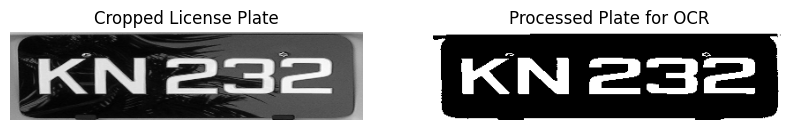

In [6]:
import cv2
import easyocr
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "./CarPlateForOCR/car2.png"  # Replace with the actual file path
image = cv2.imread(image_path)

# Convert image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Enhance contrast
gray_enhanced = cv2.equalizeHist(gray)

# Apply Gaussian blur to reduce noise while keeping edges sharp
blurred = cv2.GaussianBlur(gray_enhanced, (3,3), 0)

# Use Canny Edge Detection to find edges in the image
edges = cv2.Canny(blurred, 100, 200)

# Find contours from the edges
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Sort contours by area and keep the largest ones (likely the plate)
plate_region = None
for contour in sorted(contours, key=cv2.contourArea, reverse=True)[:5]:
    x, y, w, h = cv2.boundingRect(contour)
    aspect_ratio = w / float(h)
    if 2 < aspect_ratio < 5:  # Typical aspect ratio of a license plate
        plate_region = gray[y:y+h, x:x+w]
        break

# If no plate is detected, fallback to using the full image
if plate_region is None:
    plate_region = gray

# Resize for better OCR accuracy
plate_resized = cv2.resize(plate_region, (400, 100))

# Apply adaptive thresholding for better character clarity
_, plate_thresh = cv2.threshold(plate_resized, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Initialize EasyOCR reader
reader = easyocr.Reader(['en'])

# Perform OCR on the cropped license plate
easyocr_text = reader.readtext(plate_thresh, detail=0)  # Extract text only

# Extracted plate number
extracted_plate_number = ' '.join(easyocr_text).strip()

# Display results
print("🔹 Extracted License Plate Text:", extracted_plate_number)

# Show processed images for debugging
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(plate_resized, cmap='gray')
plt.title("Cropped License Plate")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(plate_thresh, cmap='gray')
plt.title("Processed Plate for OCR")
plt.axis("off")

plt.show()
